<h1 style="color:#0AA079"> Bienvenidos a este poderoso curso de optimización =)</h1> 

![PICTURE](PIC_1.png)


<center> <h3 style="color:#0AA079"> Solo se requiere actitud y ganas de aprender</h3> </center> 


In [22]:
import sympy as sym
from IPython.display import display #Nos permite visualizar de una forma simbólica
import numpy as np
import matplotlib.pyplot as plt

In [23]:
plt.style.use('_mpl-gallery') # Añade estilo(cuadricula) a las gráficas 2D

<h2 style="color:#3498DB"> Función-maximizar</h2>  

$$\max_{b} 2(\frac{330-2b}{3})b$$

<h3 style="color:#3498DB">Representaciones simbólicas  b,h</h3>  


In [24]:
b,h= sym.symbols('b,h',real=True) # .symbols(V.I) declaración variables independientes V.I
expr_b=  2*((330-2*b)/3)*b # representación simbólicamente de b
expr_h=(330-2*b)/3 # representación simbólicamente de h


In [25]:
display(expr_b) # visualización simbólica de b

b*(220 - 4*b/3)

In [26]:
display(expr_h) # visualización simbólica de h

110 - 2*b/3

<h2 style="color:#40C220"> Primera Derivada</h2>  


In [27]:
dev_p_b=sym.diff(expr_b,b) # .diff(expresión simbólica, variable) método para derivar
display(dev_p_b)

220 - 8*b/3

<h2 style="color:#40C220"> Segunda Derivada</h2>  


In [28]:
dev_s_b=sym.diff(expr_b,b,2) # .diff(expresión simbólica, variable) método para derivar
display(dev_s_b)

-8/3

<h2 style="color:#F10F1C"> Puntos crìticos</h2>  
<h3>Un punto critico es donde la derivada es igual a acero o no existe (debido a una indeterminación).</h3>  

In [29]:
pt_crit=sym.solve(dev_p_b,b) # .solve(expresión simbólica, variable) método resolver ecuaciones (lineales y no lineales)
print(pt_crit)

[165/2]


<h3 style="color:#F10F1C"> ¿Hay indeterminaciones en la derivada?</h2>  


In [30]:
#En este caso no hay, pero su hubiera se deben agregan con .append() como sabemos ... =)
#pt_crit.append()

<h2 style="color:#FF33D1"> Criterio primera derivada</h2>  

In [31]:
def criterio_pd(inte,var,dev):
    '''
    inte = Intervalos
    var = Variable independiente (V.I)
    dev = Derivada
    '''
    
    
    dev_eva=sym.lambdify(var, dev)

    for intr in range(len(inte)-1):
        print('Intervalo ({},{})'.format(inte[intr],inte[intr+1]))    
        value=np.random.uniform(inte[intr]+0.001,inte[intr+1])
        print('Valor que seleccionamos  = {}'.format(value))
    
        if dev_eva(value) >0:
            print('Creciente')
        else:
            print('Decreciente')

        print('\n')

<h3 style="color:#FF33D1"> 1- Organizar de menor a  mayor</h3>  

In [32]:
pt_crit.sort() # .sort() organizar de menor a  mayor
print(pt_crit)

[165/2]


<h3 style="color:#FF33D1"> 2- Intervalos laterales</h3> 
$$ (-\infty,\frac{165}{2}) $$
$$ (\frac{165}{2},+\infty) $$

In [33]:
# Creamos una nueva variable, para almacenar los intervalos laterales teniendo en cuenta los puntos críticos
intervalos=pt_crit.copy() #.copy() retorna una nueva lista sin modificar la original

intervalos.insert(0,pt_crit[0]-0.3) # Un valor hacia el  menos infinito
intervalos.insert(len(intervalos),pt_crit[-1]+0.3) # Un valor hacia el màs infinito
print(intervalos)

[82.2000000000000, 165/2, 82.8000000000000]


<h3 style="color:#FF33D1"> 3- Evaluar intervalos</h3>  

In [34]:
help(criterio_pd)

Help on function criterio_pd in module __main__:

criterio_pd(inte, var, dev)
    inte = Intervalos
    var = Variable independiente (V.I)
    dev = Derivada



In [35]:
criterio_pd(intervalos,b,dev_p_b) # Intervalos, Variable independiente (V.I), Derivada

Intervalo (82.2000000000000,165/2)
Valor que seleccionamos  = 82.42557947414878
Creciente


Intervalo (165/2,82.8000000000000)
Valor que seleccionamos  = 82.71760163178769
Decreciente




<h3 style="color:#0999B4"> Lo cual sígnica que hay un máximo en el punto crítico 165/2 =)</h3>  

<h2 style="color:#335BFF"> Ahora con el criterio de la segunda derivada =)</h2>  

In [36]:
def criterio_sd(pt_cri,var,s_dev):
    '''
    pt_cri = Puntos crìticos
    var = Variable independiente
    s_dev = segunda derivada
    '''
   
    sdev_eva=sym.lambdify(var, s_dev) #Segunda derivada evaluar puntos crìticos

    for value in pt_cri:
        
        try:
            if sdev_eva(value) >0:
                
                print(' {} tiene signo positivo, hay un mìnimo'.format(value))
            
            elif sdev_eva(value)<0: 
                print(' {} tiene signo negativo hay un màximo'.format(value))
            else:
                print(' {} es igual a cero, usar criterio primera derivada'.format(value))
        except Exception as error:
            print('Cuidado indeterminación = ',error)


In [37]:
help(criterio_sd)

Help on function criterio_sd in module __main__:

criterio_sd(pt_cri, var, s_dev)
    pt_cri = Puntos crìticos
    var = Variable independiente
    s_dev = segunda derivada



In [38]:
criterio_sd(pt_crit,b,dev_s_b) # Puntos crìticos, Variable independiente, Segunda derivada

 165/2 tiene signo negativo hay un màximo


<h3 style="color:#0999B4">Se llega exactamente a la misma respuesta con el criterio de la segunda derivada hay un máximo en 165/2 </h3>  

<h2 style="color:#15CEC0"> ¿Y la gráfica? =)</h2>  
<h3 style="color:#D82813"> Cuidado en sobrescribir las variables simbólicas</h3>  

In [39]:
b1 = np.linspace(-50, 200, 120) # Valores de la variable independiente (dominio)
y1=sym.lambdify(b,expr_b) # Función original, representada simbólicamente

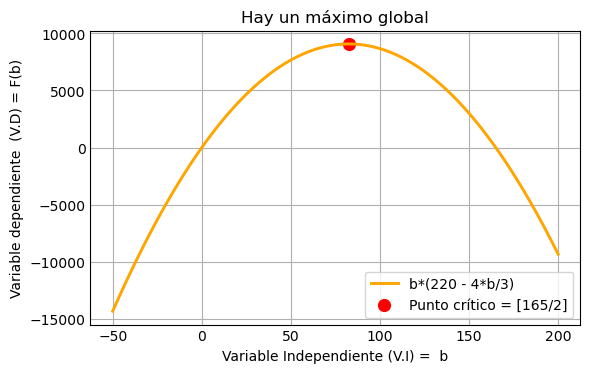

In [40]:
fig, ax = plt.subplots(figsize = (5,3))

ax.plot(b1, y1(b1),linewidth=2.1, c='orange', label=expr_b)

# str() convierte el valor especificado en un string
ax.scatter(pt_crit,y1(pt_crit[0]), c='red',s=72,label='Punto crítico = '+str(pt_crit)) 

ax.set_title('Hay un máximo global') # Añadir título
ax.set_xlabel('Variable Independiente (V.I) =  b') # Añadir label eje de las abscisas
ax.set_ylabel('Variable dependiente  (V.D) = F(b)') # Añadir label eje de las ordenadas
ax.legend() # Para activar la etiqueta (label)

plt.show()

<h3 style="color:#0999B4">Hallamos el máximo global de la función el cual nos da el valor de b que es una variable independiente</h3>  

<h3 style="color:#10B8AB">¿Nos faltaría hallar el  valor de h que es otra variable independiente?</h3>  

In [41]:
valor_h= sym.lambdify(b,expr_h)
print('El valor de h = {} '.format(valor_h(pt_crit[0])))

El valor de h = 55.0000000000000 


<h3 style="color:#1FC42B">Nuevamente dese cuenta por favor del poder la optimización =)</h3>  

In [42]:
print('Para que haya un área máxima b = {} y h = {}'.format(pt_crit[0],valor_h(pt_crit[0])))

Para que haya un área máxima b = 165/2 y h = 55.0000000000000
